<a href="https://colab.research.google.com/github/Badjedi04/NLP-733/blob/main/CS733.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 2.8 MB/s 


# Scrapping the Twitter data

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

query = "#gotagohome OR #gotagoranil OR #srilankaeconomiccrisis OR #gohomegota OR #gohomemahinda OR #gohomerajapaksas OR #srilankacrisis OR # fuelcrisislk OR #srilankaprotests) lang:en until:2022-08-16 since:2022-07-16 -filter:links -filter:replies"
tweets = []
limit = 50000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
        
        #print(vars(tweet))
        #break
        if len(tweets) == limit:
                break
        else:
                tweets.append([tweet.date, tweet.user.username, tweet.content])
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
print(df)

df.to_csv('tweets_post.csv')

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 5.1 MB/s 
     |████████████████████████████████| 182 kB 42.9 MB/s 
     |████████████████████████████████| 7.6 MB 34.5 MB/s 


In [ ]:
import pandas as pd
from transformers import pipeline
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk

tokenizer = RegexpTokenizer(r'\w+')
nltk.download('stopwords')

classifier = pipeline("sentiment-analysis")
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from glob import glob

input_files = glob('/content/drive/My Drive/NLP-733/tweets_p*.csv')
input_files


['/content/drive/My Drive/NLP-733/tweets_pre.csv',
 '/content/drive/My Drive/NLP-733/tweets_post.csv']

In [ ]:
def sentiment(val):
    
    res = classifier(val)
    
    return res

def read_csv(fil):
    df = pd.read_csv(fil)
    print(fil)
    for idx,row in df.iterrows():
        text_val = row['Tweet']
        #print(text_val)
       
        new_text = tokenizer.tokenize(text_val)
        new_text = ' '.join(new_text)
        #invoke the sentiment funciton
        sen_ouput = sentiment(new_text)
        
        df.loc[idx,'Updated_Tweet']=new_text
        df.loc[idx,'Sentiment'] = sen_ouput[0]['label']
        df.loc[idx,'Score'] = sen_ouput[0]['score']
    return df

# for i in input_files:

#   data = read_csv(i)
#   data.to_csv(i)
data = read_csv('/content/drive/My Drive/NLP-733/tweets_post.csv')

/content/drive/My Drive/NLP-733/tweets_post.csv


In [67]:
#data.to_csv('/content/drive/My Drive/NLP-733/tweets_post.csv')
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/NLP-733/tweets_post.csv')
data

,Unnamed: 0,Unnamed: 0.1,Date,User,Tweet,Updated_Tweet,Sentiment,Score
0,0,0,2022-08-15 18:24:59+00:00,SriLankanBuzz,Today's Trending #Tags 15-8-2022. 1/5\n ...,Today s Trending Tags 15 8 2022 1 5 1 SriLanka...,NEGATIVE,0.615745
1,1,1,2022-08-15 13:57:56+00:00,Rasiya_Twitz,Ratings agency S&amp;P Global on Monday (15) s...,Ratings agency S amp P Global on Monday 15 sla...,NEGATIVE,0.999537
2,2,2,2022-08-15 13:15:43+00:00,finityfund,Global ratings agency S&amp;P Global slashed i...,Global ratings agency S amp P Global slashed i...,NEGATIVE,0.999473
3,3,3,2022-08-15 12:53:30+00:00,HakimUsoof,"With 5 days work for public sector, 5 days sch...",With 5 days work for public sector 5 days scho...,NEGATIVE,0.990905
4,4,4,2022-08-15 12:41:36+00:00,PrabodOfficial,Global ratings agency S&amp;P Global slashed i...,Global ratings agency S amp P Global slashed i...,NEGATIVE,0.997108
...,...,...,...,...,...,...,...,...
3217,3217,3217,2022-07-16 00:43:53+00:00,JayGoonetilleke,#SriLanka 🙏🏽 clowns 🤡 show lead by @sajithprem...,SriLanka clowns show lead by sajithpremadasa s...,POSITIVE,0.782262
3218,3218,3218,2022-07-16 00:35:09+00:00,JustinCurley4,#SriLankaProtests \nPeace to Sri Lanka xx,SriLankaProtests Peace to Sri Lanka xx,POSITIVE,0.993373
3219,3219,3219,2022-07-16 00:29:03+00:00,rgabeysinghe,SLPP must support a candidate fielded by the S...,SLPP must support a candidate fielded by the S...,NEGATIVE,0.944169
3220,3220,3220,2022-07-16 00:25:39+00:00,rgabeysinghe,SJB leader Sajith Premadasa in a Twitter messa...,SJB leader Sajith Premadasa in a Twitter messa...,NEGATIVE,0.972688


/content/drive/My Drive/NLP-733/tweets_pre.csv
['tweets_pre']
/content/drive/My Drive/NLP-733/tweets_post.csv
['tweets_post']
/content/drive/My Drive/NLP-733/updated_tweets.csv
['updated_tweets']


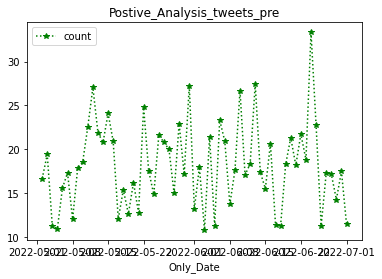

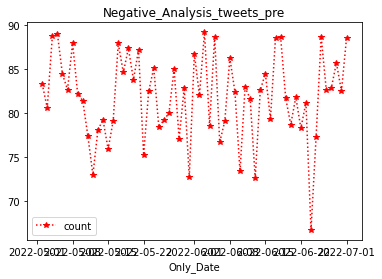

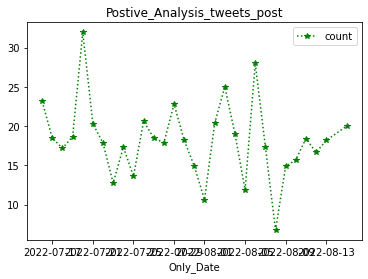

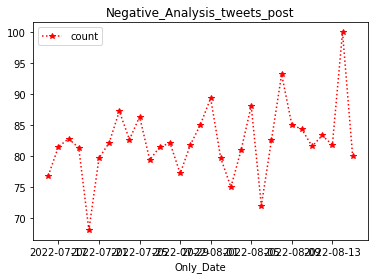

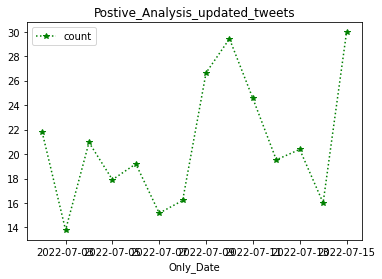

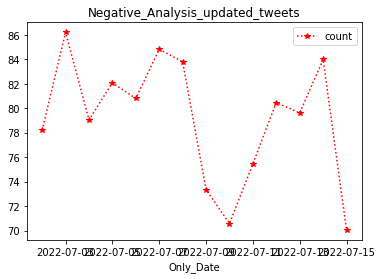

In [107]:

import numpy as np
from glob import glob
import re

def plotting_sentiment(inp_file):
  data = pd.read_csv(inp_file)
  file_name = re.findall(r'[^\/]+(?=\.)',inp_file)
  print(file_name)
  #adding sentiment score to the sentiment text
  data['Sentiment_score'] = np.where(data['Sentiment']=='POSITIVE', 1, 0)
  data['Only_Date'] = pd.to_datetime(data['Date']).dt.date

  s=data.groupby(['Only_Date','Sentiment_score']).size()

  sd = s.to_frame().reset_index()
  data1 = sd.rename(columns={0:'count'})

  #calculate the percentage
  data_per = data1.groupby(['Only_Date', 'Sentiment_score']).agg({'count': 'sum'})
  #Change: groupby state_office and divide by sum
  fin_data = data_per.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))


  fin_data=fin_data.reset_index()
  fdp = fin_data[fin_data['Sentiment_score'] == 1]
  fdn = fin_data[fin_data['Sentiment_score'] == 0]

  fdp.plot.line(x='Only_Date', y='count',style={'count': '*:g'},title="Postive_Analysis"+"_"+file_name[0])

  fdn.plot.line(x='Only_Date', y='count',style={'count': '*:r'},title="Negative_Analysis"+"_"+file_name[0])



input_files = glob('/content/drive/My Drive/NLP-733/*.csv')

for i in input_files[1:4]:
    print(i)
    #invoking plotting function
    plotting_sentiment(i)

'/content/drive/My Drive/NLP-733/tweets_pre.csv'